In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
from dask.distributed import Client, progress
# HPC
# client = Client(scheduler_file='/glade/scratch/jhamman/scheduler.json')
# client

from dask_kubernetes import KubeCluster
cluster = KubeCluster(n_workers=10)
cluster

In [3]:
client = Client(cluster)
client

Client Scheduler: tcp://10.32.2.52:46483 Dashboard: /user/0000-0001-7783-5629/proxy/8787/status,Cluster Workers: 9 Cores: 18 Memory: 63.00 GB


In [4]:
import gcsfs

fs = gcsfs.GCSFileSystem(project='pangeo-181919', token='anon', access='read_only')
gcsmap = gcsfs.mapping.GCSMap('pangeo-data/gmet_v1.zarr',
                              gcs=fs, check=False, create=False)
ds = xr.open_zarr(gcsmap)


In [5]:
ds

<xarray.Dataset>
Dimensions:    (ensemble: 100, lat: 224, lon: 464, time: 12054)
Coordinates:
  * ensemble   (ensemble) int64 0 1 2 3 4 5 6 7 8 ... 91 92 93 94 95 96 97 98 99
  * lat        (lat) float64 25.06 25.19 25.31 25.44 ... 52.56 52.69 52.81 52.94
  * lon        (lon) float64 -124.9 -124.8 -124.7 ... -67.31 -67.19 -67.06
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2012-12-31
Data variables:
    elevation  (lat, lon) float64 dask.array<shape=(224, 464), chunksize=(224, 464)>
    mask       (lat, lon) int32 dask.array<shape=(224, 464), chunksize=(224, 464)>
    pcp        (ensemble, time, lat, lon) float64 dask.array<shape=(100, 12054, 224, 464), chunksize=(1, 366, 224, 464)>
    t_max      (ensemble, time, lat, lon) float64 dask.array<shape=(100, 12054, 224, 464), chunksize=(1, 366, 224, 464)>
    t_mean     (ensemble, time, lat, lon) float64 dask.array<shape=(100, 12054, 224, 464), chunksize=(1, 366, 224, 464)>
    t_min      (ensemble, time, lat, lon) float6

In [8]:
gcsmap=gcsfs.mapping.GCSMap('pangeo-data/llc4320_surface/Eta',gcs=fs,check=False,create=False)
ds=xr.open_zarr(gcsmap)

In [9]:
ds

<xarray.Dataset>
Dimensions:  (face: 13, i: 4320, j: 4320, time: 9030)
Coordinates:
  * face     (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
  * i        (i) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * j        (j) int64 0 1 2 3 4 5 6 7 ... 4313 4314 4315 4316 4317 4318 4319
  * time     (time) datetime64[ns] 2011-09-13 ... 2012-09-23T05:00:00
Data variables:
    Eta      (time, face, j, i) float32 dask.array<shape=(9030, 13, 4320, 4320), chunksize=(1, 1, 4320, 4320)>
Attributes:
    Conventions:  CF-1.6
    history:      Created by calling `open_mdsdataset(llc_method='smallchunks...
    source:       MITgcm
    title:        netCDF wrapper of MITgcm MDS binary data

In [16]:
dst=ds.sel(time='2012-01-01T01:00:00',face=2)

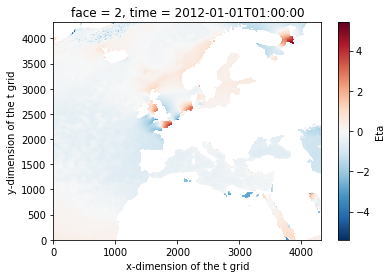

In [17]:
dst['Eta'].plot()

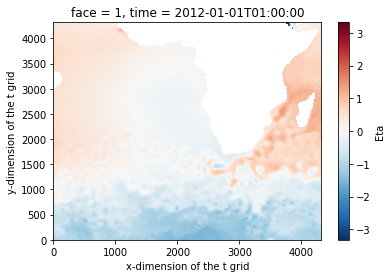

In [18]:
dst=ds.sel(time='2012-01-01T01:00:00',face=1)
dst['Eta'].plot()